In [1]:
from src.client import Client

import matplotlib.pyplot as plt
from PIL import Image
import requests
import io

In [2]:
def read_img(url):
    '''
    Read image from url
    '''
    req_img = requests.get(url).content
    img = Image.open(io.BytesIO(req_img))
    return img


def draw_response(url, result):
    orig_img = read_img(url)
    subplot_num = len(result) + 1
    plt.close()
    plt.figure(figsize=(5 * subplot_num,5))
    
    plt.subplot(1, subplot_num, 1)
    plt.imshow(orig_img)

    plt.subplot(1, subplot_num, 2)
    plt.imshow(result[0])
    
    if subplot_num == 3:
        plt.subplot(1, subplot_num, 3)
        plt.imshow(result[1])
    
    plt.show()

In [3]:
urls = [
    r'https://00.img.avito.st/image/1/1.TS0C-La44cQ0USPBFPVsPjla48K8WWPMdFzjxrJR6c60.tJU3U0ZP3BlosloS0te97PuyC3k47oSVhQaJvtWq0io',
    r'https://60.img.avito.st/image/1/1.ZSRRcra4yc1nxUvAF1dNI2TQy8vv00vbZ97Lz-Hbwcfn.jfQln5nWSg4VETgb7owRGLiLgtSFdKu4KkN2vL6XKaw',
    r'https://50.img.avito.st/image/1/1.oaLQqLa4DUvmAc9Onrbyx-MKD01uCY9DpgwPSWABBUFm.3hFvAfDTU231YBeZyNfRQCkzkCPw3g3GCTr1PN2_jxg',
    r'https://70.img.avito.st/image/1/1.vMhO17a4ECF4ftIkOqGzjXt1EifwdpIpOHMSI_5-GCv4.YHhhIatQHjUmyfP6KDXaNYt5kW1DurOuVFvjOHMS9x4',
    r'https://60.img.avito.st/image/1/1.YRPe17a4zfrofg__kMJJOe51z_xgdk_yqHPP-G5-xfBo.U0htBgI-0-Hz7EmKeDR3LI-cKhXd1z-yYgl7AiBq3nA',
    r'https://30.img.avito.st/image/1/1.xtCY6ra5ajmuQ6g8mIX453tJbDMsyWL7KUloPSRDYDs.gQlB4xwXpezHKDwRdmvKgsAKCF-0OQdSMxjKliambng',
    r'https://30.img.avito.st/image/1/1.gINi2ba4LGpUcO5vbqvoklx7LmzceK5iFH0uaNJwJGDU.g0OntuAbjE1x_hIpMM4SvQ2MQ0-dCzljqgU7pAc3EOI',
    r'https://40.img.avito.st/image/1/1.6vJk77a4RhtSRoQePLyrhF1NRB3aTsQTEktEGdRGThHS.ZIOwpVMqmo9OFT5XkaXWUbBtTwVxcAuxdpKjmgwGqhg',
]

In [4]:
cl = Client('http://127.0.0.1:8080')

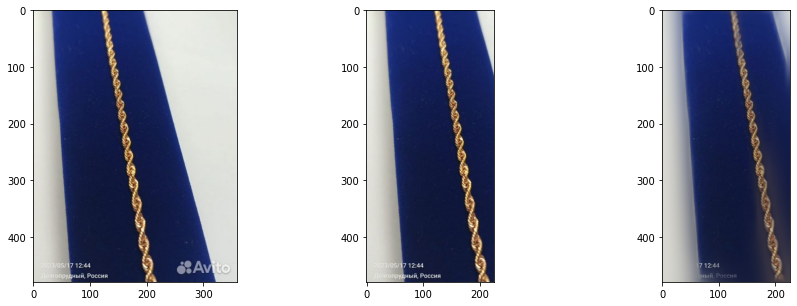

In [5]:
result = cl.process_url(urls[0],
               mode='both')

draw_response(urls[0], result)

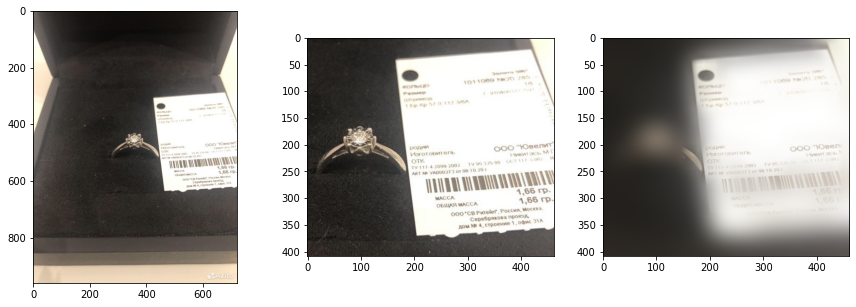

In [6]:
result = cl.process_url(urls[1],
               mode='both')

draw_response(urls[1], result)

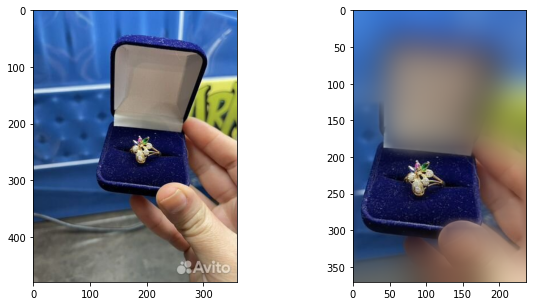

In [7]:
result = cl.process_url(urls[2],
               mode='blur')

draw_response(urls[2], result)

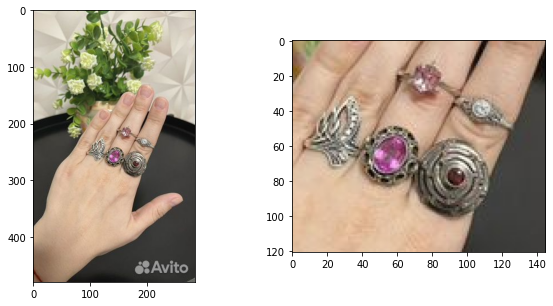

In [8]:
result = cl.process_url(urls[3],
               mode='crop')

draw_response(urls[3], result)

In [9]:
result = cl.process_url(r'https://60.img.avito.st/image/1/1',
               mode='both')

RuntimeError: 400 Error! Could not extract image from the url

In [10]:
result = cl.process_url(urls[0],
               mode='sandwich')

RuntimeError: 400 Error! Mode has to be either "crop", "blur" or "both".